In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

JUPITER_RAD = 11.209  # Radius of Jupiter in Earth radii
JUPITER_MASS = 317.83 # Mass of Jupiter in Earth mass units

# Load the dataset
df = pd.read_csv('cleaned_5250.csv')
print(df.shape)
df.head(10)

(5250, 13)


,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,19.40000,Jupiter,1.080,Jupiter,1.290000,0.892539,0.23,Radial Velocity
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,14.74000,Jupiter,1.090,Jupiter,1.530000,1.400000,0.08,Radial Velocity
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,4.80000,Jupiter,1.150,Jupiter,0.830000,0.508693,0.00,Radial Velocity
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,8.13881,Jupiter,1.120,Jupiter,2.773069,4.800000,0.37,Radial Velocity
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.78000,Jupiter,1.200,Jupiter,1.660000,2.200000,0.68,Radial Velocity
5,17 Scorpii b,408.0,5.22606,Gas Giant,2020,4.32000,Jupiter,1.150,Jupiter,1.450000,1.600000,0.06,Radial Velocity
6,18 Delphini b,249.0,5.51048,Gas Giant,2008,10.30000,Jupiter,1.110,Jupiter,2.600000,2.700000,0.08,Radial Velocity
7,1RXS J160929.1-210524 b,454.0,12.61800,Gas Giant,2008,8.00000,Jupiter,1.664,Jupiter,330.000000,6505.900000,0.00,Direct Imaging
8,24 Bootis b,313.0,5.59000,Gas Giant,2018,0.91000,Jupiter,1.240,Jupiter,0.190000,0.083231,0.04,Radial Velocity
9,24 Sextantis b,235.0,6.45350,Gas Giant,2010,1.99000,Jupiter,1.190,Jupiter,1.333000,1.239699,0.09,Radial Velocity


In [2]:
# Show the possible planet types in the data
print(df.planet_type.unique())
print(df.planet_type.value_counts())
print(df.radius_wrt.unique())
print(df.mass_wrt.unique())
print(df.shape)

['Gas Giant' 'Super Earth' 'Neptune-like' 'Terrestrial' 'Unknown']
planet_type
Neptune-like    1825
Gas Giant       1630
Super Earth     1595
Terrestrial      195
Unknown            5
Name: count, dtype: int64
['Jupiter' 'Earth' nan]
['Jupiter' 'Earth' nan]
(5250, 13)


In [3]:
# Remove entries where either radius nor mass is not recorded
#df = df.dropna(subset=['radius_wrt', 'mass_wrt'])
print(df['radius_wrt'].unique())
print(df['mass_wrt'].unique())
df.shape

['Jupiter' 'Earth' nan]
['Jupiter' 'Earth' nan]


(5250, 13)

In [4]:
# Calculate radii and masses in terms of Earth radius and mass
df['radius'] = np.where(df['radius_wrt'] == 'Earth', df['radius_multiplier'], df['radius_multiplier'] * JUPITER_RAD)
df['mass'] = np.where(df['mass_wrt'] == 'Earth', df['mass_multiplier'], df['mass_multiplier'] * JUPITER_MASS)
df.head()

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method,radius,mass
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,19.40000,Jupiter,1.08,Jupiter,1.290000,0.892539,0.23,Radial Velocity,12.10572,6165.902000
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,14.74000,Jupiter,1.09,Jupiter,1.530000,1.400000,0.08,Radial Velocity,12.21781,4684.814200
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,4.80000,Jupiter,1.15,Jupiter,0.830000,0.508693,0.00,Radial Velocity,12.89035,1525.584000
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,8.13881,Jupiter,1.12,Jupiter,2.773069,4.800000,0.37,Radial Velocity,12.55408,2586.757982
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.78000,Jupiter,1.20,Jupiter,1.660000,2.200000,0.68,Radial Velocity,13.45080,565.737400


In [5]:
# Drop irrelevant columns
df = df.drop(labels=['radius_wrt', 'mass_wrt', 'radius_multiplier', 'mass_multiplier', 'discovery_year'], axis='columns')
df.head()

,name,distance,stellar_magnitude,planet_type,orbital_radius,orbital_period,eccentricity,detection_method,radius,mass
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,1.290000,0.892539,0.23,Radial Velocity,12.10572,6165.902000
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,1.530000,1.400000,0.08,Radial Velocity,12.21781,4684.814200
2,14 Andromedae b,246.0,5.23133,Gas Giant,0.830000,0.508693,0.00,Radial Velocity,12.89035,1525.584000
3,14 Herculis b,58.0,6.61935,Gas Giant,2.773069,4.800000,0.37,Radial Velocity,12.55408,2586.757982
4,16 Cygni B b,69.0,6.21500,Gas Giant,1.660000,2.200000,0.68,Radial Velocity,13.45080,565.737400


In [6]:
# Count null values
print(df.isnull().sum())

name                   0
distance              17
stellar_magnitude    161
planet_type            0
orbital_radius       289
orbital_period         0
eccentricity           0
detection_method       0
radius                17
mass                  23
dtype: int64


In [7]:
# Possible planet types
print(df.planet_type.unique())
print(df[df.planet_type == 'Unknown'])
#df = pd.get_dummies(df, columns=['detection_method'], drop_first=True)
unknown = df[df.planet_type == 'Unknown']
df = df.drop(df[df.planet_type == 'Unknown'].index) # Drop unknown planets
print(df.planet_type.unique())

['Gas Giant' 'Super Earth' 'Neptune-like' 'Terrestrial' 'Unknown']
                name  distance  stellar_magnitude planet_type  orbital_radius  \
4474  KIC 10001893 b    5457.0             15.829     Unknown             NaN   
4475  KIC 10001893 c    5457.0             15.829     Unknown             NaN   
4476  KIC 10001893 d    5457.0             15.829     Unknown             NaN   
4574       LkCa 15 b     516.0             12.025     Unknown            14.7   
4575       LkCa 15 c     516.0             12.025     Unknown            18.6   

      orbital_period  eccentricity               detection_method  radius  \
4474        0.000548           0.0  Orbital Brightness Modulation     NaN   
4475        0.000821           0.0  Orbital Brightness Modulation     NaN   
4476        0.002190           0.0  Orbital Brightness Modulation     NaN   
4574        0.999316           0.0                 Direct Imaging     NaN   
4575        0.999316           0.0                 Direct Ima

In [8]:
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Select features to be used to train model
features = df.drop(['planet_type', 'name', 'distance', 'stellar_magnitude', 'orbital_radius', 'orbital_period', 'eccentricity', 'detection_method'], axis=1)
print(features.shape)
# One-hot encode the 'detection_method' column
#features = pd.get_dummies(features, columns=['detection_method'], drop_first=True)

# Use KNN imputer to fill in missing values
imputer = KNNImputer(n_neighbors=5)
features = pd.DataFrame(imputer.fit_transform(features), columns=features.columns)

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    features, df['planet_type'], test_size=0.2, random_state=42
)

# Choose ML model to use
model = RandomForestClassifier(random_state=42)

# Train model
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

(5245, 2)
Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

   Gas Giant       1.00      1.00      1.00       345
Neptune-like       1.00      0.98      0.99       367
 Super Earth       0.97      1.00      0.99       300
 Terrestrial       1.00      1.00      1.00        37

    accuracy                           0.99      1049
   macro avg       0.99      0.99      0.99      1049
weighted avg       0.99      0.99      0.99      1049

Confusion Matrix:
[[344   1   0   0]
 [  0 358   9   0]
 [  0   0 300   0]
 [  0   0   0  37]]


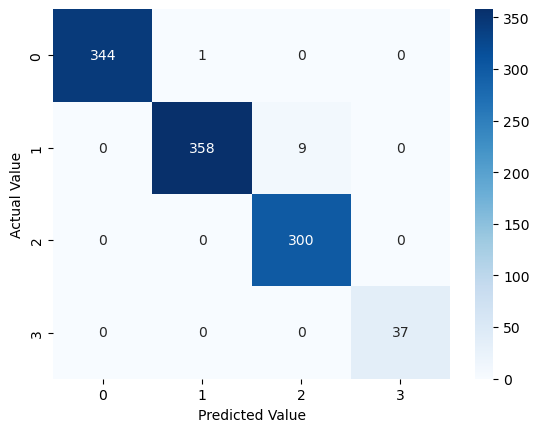

Class 0: Gas Giant
Class 1: Neptune-like
Class 2: Super Earth
Class 3: Terrestrial


In [9]:
from sklearn.preprocessing import label_binarize
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix of results
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.show()

# Assuming 'y_test' contains the true labels and 'y_pred' contains the predicted labels
unique_labels = np.unique(y_test)

class_mapping = {}
for i, label in enumerate(unique_labels):
    class_mapping[i] = label

# Use class_mapping to map the numeric labels to their corresponding planet types
mapped_y_test = np.vectorize(class_mapping.get)(y_test)
mapped_y_pred = np.vectorize(class_mapping.get)(y_pred)

for i, label in class_mapping.items():
    print(f"Class {i}: {label}")

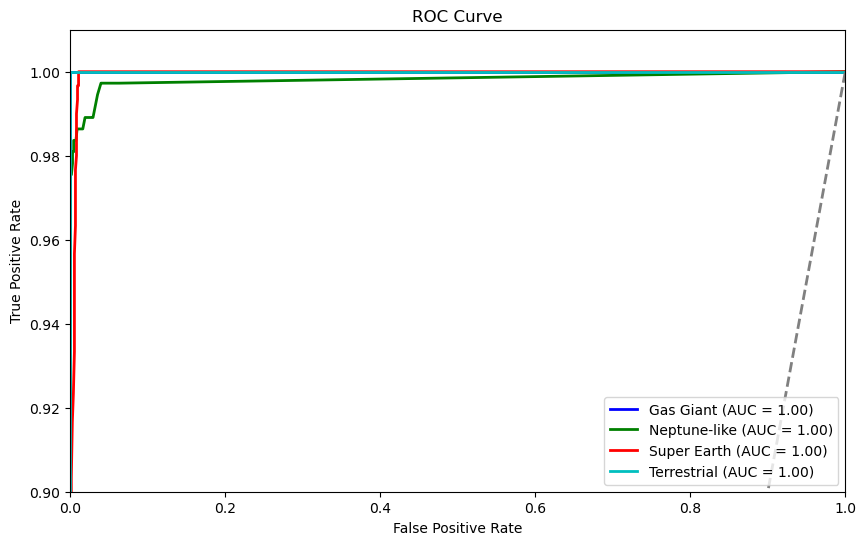

In [10]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
y_probs = model.predict_proba(X_test)
# 'y_test' and 'y_probs' are arrays with the true labels and predicted probabilities for each class

# Convert the multiclass labels to binary format
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = len(np.unique(y_test))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Plot ROC curves
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'{class_mapping[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.9, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

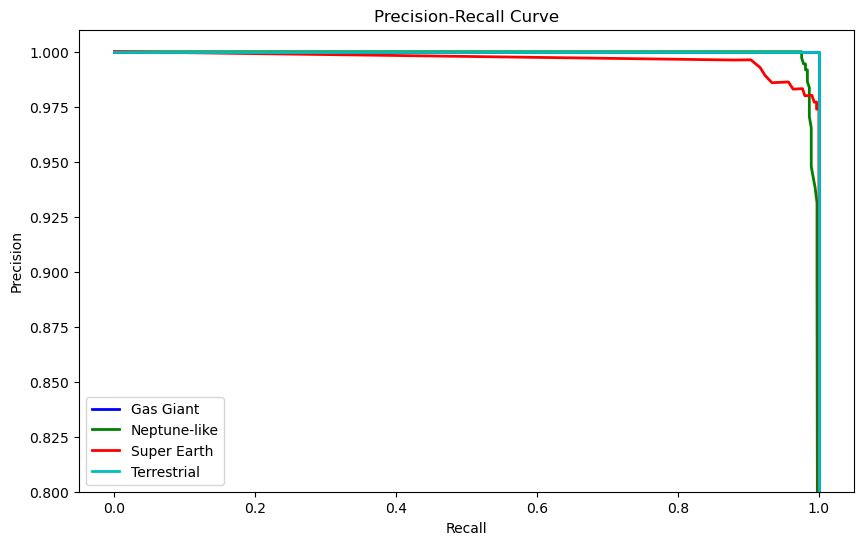

Class 0: Average Precision = 1.00
Class 1: Average Precision = 1.00
Class 2: Average Precision = 1.00
Class 3: Average Precision = 1.00


In [11]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# 'y_test' and 'y_probs' are arrays with the true labels and predicted probabilities for each class
# Convert the multiclass labels to binary format
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Compute Precision-Recall curve for each planet type
precision = dict()
recall = dict()

n_classes = len(np.unique(y_test))
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_probs[:, i])
    
# Plot Precision-Recall curves
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

for i, color in zip(range(n_classes), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2, label=f'{class_mapping[i]}')

    
plt.ylim([0.8, 1.01])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Calculate average precision for each class
average_precision = dict()
for i in range(n_classes):
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_probs[:, i])

# Print average precision for each class
for i in range(n_classes):
    print(f'Class {i}: Average Precision = {average_precision[i]:.2f}')


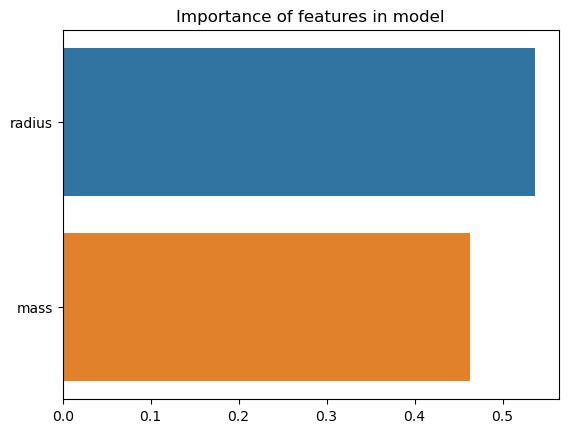

In [12]:
# Show importance of each feature in model in making classification
importances = model.feature_importances_
features = X_train.columns

sns.barplot(x=importances, y=features)
plt.title('Importance of features in model')
plt.show()

In [13]:
# Test model on unknown planets
print(unknown)

unknown_features = unknown.drop(['planet_type', 'name', 'distance', 'stellar_magnitude', 'orbital_radius', 'orbital_period', 'eccentricity', 'detection_method'], axis=1)
print(unknown_features)

unknown_imputed = pd.DataFrame(imputer.transform(unknown_features), columns=unknown_features.columns)
predictions = model.predict(unknown_imputed)
class_probabilities = model.predict_proba(unknown_imputed)
print(predictions)
print(class_probabilities)

                name  distance  stellar_magnitude planet_type  orbital_radius  \
4474  KIC 10001893 b    5457.0             15.829     Unknown             NaN   
4475  KIC 10001893 c    5457.0             15.829     Unknown             NaN   
4476  KIC 10001893 d    5457.0             15.829     Unknown             NaN   
4574       LkCa 15 b     516.0             12.025     Unknown            14.7   
4575       LkCa 15 c     516.0             12.025     Unknown            18.6   

      orbital_period  eccentricity               detection_method  radius  \
4474        0.000548           0.0  Orbital Brightness Modulation     NaN   
4475        0.000821           0.0  Orbital Brightness Modulation     NaN   
4476        0.002190           0.0  Orbital Brightness Modulation     NaN   
4574        0.999316           0.0                 Direct Imaging     NaN   
4575        0.999316           0.0                 Direct Imaging     NaN   

      mass  
4474   NaN  
4475   NaN  
4476   NaN 